In [1]:
#Steven's Workbook for forecasting based on historical data.
# use combined_data_index to perform forecasting/predictions
# 

In [2]:
# install/check prophet requirements
!pip install prophet


In [3]:
# Import the required libraries and dependencies
import numpy as np
import pandas as pd
from prophet import Prophet
import datetime as dt
%matplotlib inline

In [4]:
# Read the data from the SPWR.csv file into a Pandas DataFrame
SPWR_stock_df = pd.read_csv("/Users/stevenhill/Desktop/project_1_group_2/data/SPWR.csv", index_col="Date")
CSIQ_stock_df = pd.read_csv("/Users/stevenhill/Desktop/project_1_group_2/data/CSIQ.csv", index_col="Date")
display(SPWR_stock_df.head())
display(CSIQ_stock_df.head())

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,5.173543,5.173543,5.029470,5.127701,5.127701,2764786
2020-01-03,5.062213,5.094957,4.813360,4.826457,4.826457,7053366
2020-01-06,4.734774,4.937787,4.643091,4.891945,4.891945,5552325
2020-01-07,4.905043,5.094957,4.833006,5.003274,5.003274,3223344
2020-01-08,4.963982,5.101506,4.885396,5.029470,5.029470,4496252


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,22.360001,22.540001,22.040001,22.520000,22.520000,643300
2020-01-03,22.190001,22.440001,21.590000,21.799999,21.799999,809600
2020-01-06,21.309999,22.330000,21.100000,22.320000,22.320000,938000
2020-01-07,22.290001,22.600000,22.219999,22.360001,22.360001,596900
2020-01-08,22.370001,22.709999,22.110001,22.570000,22.570000,709800


In [60]:
# Format index
SPWR_stock_df['Date'] = pd.to_datetime(SPWR_stock_df.index)
CSIQ_stock_df['Date'] = pd.to_datetime(CSIQ_stock_df.index)


In [61]:
# Create two new data frames with just "Date" and "Close" 

SPWR_test_df = SPWR_stock_df[["Close"]]
SPWR_test_df = SPWR_test_df.rename(columns = {"Close" : "SPWR"})
SPWR_test_df.head()


,SPWR
Date,
2020-01-02,5.127701
2020-01-03,4.826457
2020-01-06,4.891945
2020-01-07,5.003274
2020-01-08,5.029470


In [62]:
CSIQ_test_df = CSIQ_stock_df[["Close"]]
CSIQ_test_df = CSIQ_test_df.rename(columns = {"Close" : "CSIQ"})
CSIQ_test_df.head()

,CSIQ
Date,
2020-01-02,22.520000
2020-01-03,21.799999
2020-01-06,22.320000
2020-01-07,22.360001
2020-01-08,22.570000


In [63]:
ENPH_stock_df = pd.read_csv("/Users/stevenhill/Desktop/project_1_group_2/data/ENPH.csv", index_col="Date")
FSLR_stock_df = pd.read_csv("/Users/stevenhill/Desktop/project_1_group_2/data/FSLR.csv", index_col="Date")
JKS_stock_df = pd.read_csv("/Users/stevenhill/Desktop/project_1_group_2/data/JKS.csv", index_col="Date")
SEDG_stock_df = pd.read_csv("/Users/stevenhill/Desktop/project_1_group_2/data/SEDG.csv", index_col="Date")
DQ_stock_df = pd.read_csv("/Users/stevenhill/Desktop/project_1_group_2/data/DQ.csv", index_col="Date")

display(ENPH_stock_df.head())
display(FSLR_stock_df.head())
display(JKS_stock_df.head())
display(SEDG_stock_df.head())
display(DQ_stock_df.head())


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,26.370001,29.350000,26.040001,29.340000,29.340000,7775400
2020-01-03,28.790001,29.730000,28.379999,29.290001,29.290001,4811000
2020-01-06,29.049999,29.660000,27.830000,29.660000,29.660000,4628800
2020-01-07,29.820000,30.200001,28.660000,29.990000,29.990000,5363100
2020-01-08,29.680000,31.500000,29.440001,31.000000,31.000000,5446100


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,56.400002,57.259998,55.959999,57.240002,57.240002,1053800
2020-01-03,57.110001,57.660000,56.709999,57.020000,57.020000,943700
2020-01-06,56.009998,56.419998,54.779999,55.830002,55.830002,1535100
2020-01-07,55.759998,57.310001,55.759998,56.669998,56.669998,974200
2020-01-08,56.860001,57.110001,56.160000,56.700001,56.700001,725700


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,22.790001,23.850000,22.590000,23.84,22.810047,1130300
2020-01-03,23.170000,23.650000,22.480000,22.59,21.614050,1319300
2020-01-06,21.969999,22.570000,21.799999,22.49,21.518370,997800
2020-01-07,22.650000,23.000000,22.559999,22.74,21.757568,592700
2020-01-08,22.480000,22.540001,21.959999,22.23,21.269602,856900


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,97.000000,101.879997,96.750000,101.809998,101.809998,2154800
2020-01-03,100.839996,103.599998,100.019997,102.379997,102.379997,1016500
2020-01-06,101.370003,101.879997,98.635002,99.629997,99.629997,970800
2020-01-07,100.000000,102.029999,97.699997,101.790001,101.790001,834900
2020-01-08,101.190002,105.680000,101.190002,104.160004,104.160004,1041300


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,10.240,11.032,10.240,10.996,10.996,1278000
2020-01-03,10.956,11.102,10.810,10.890,10.890,879500
2020-01-06,10.838,10.840,10.502,10.770,10.770,621000
2020-01-07,10.698,10.834,10.560,10.672,10.672,475500
2020-01-08,10.682,10.932,10.682,10.876,10.876,773500


In [64]:
# Format index
ENPH_stock_df['Date'] = pd.to_datetime(ENPH_stock_df.index)
FSLR_stock_df['Date'] = pd.to_datetime(FSLR_stock_df.index)
JKS_stock_df['Date'] = pd.to_datetime(JKS_stock_df.index)
SEDG_stock_df['Date'] = pd.to_datetime(SEDG_stock_df.index)
DQ_stock_df['Date'] = pd.to_datetime(DQ_stock_df.index)

In [69]:
ENPH_test_df = ENPH_stock_df[["Close"]]
FSLR_test_df = FSLR_stock_df[["Close"]]
JKS_test_df = JKS_stock_df[["Close"]]
SEDG_test_df = SEDG_stock_df[["Close"]]
DQ_test_df = DQ_stock_df[["Close"]]

ENPH_test_df = ENPH_test_df.rename(columns = {"Close" : "ENPH"})
FSLR_test_df = FSLR_test_df.rename(columns = {"Close" : "FSLR"})
JKS_test_df = JKS_test_df.rename(columns = {"Close" : "JKS"})
SEDG_test_df = SEDG_test_df.rename(columns = {"Close" : "SEDG"})
DQ_test_df = DQ_test_df.rename(columns = {"Close" : "DQ"})

display(ENPH_test_df.head())
display(FSLR_test_df.head())
display(JKS_test_df.head())
display(SEDG_test_df.head())
display(DQ_test_df.head())




,ENPH
Date,
2020-01-02,29.340000
2020-01-03,29.290001
2020-01-06,29.660000
2020-01-07,29.990000
2020-01-08,31.000000


,FSLR
Date,
2020-01-02,57.240002
2020-01-03,57.020000
2020-01-06,55.830002
2020-01-07,56.669998
2020-01-08,56.700001


,JKS
Date,
2020-01-02,23.84
2020-01-03,22.59
2020-01-06,22.49
2020-01-07,22.74
2020-01-08,22.23


,SEDG
Date,
2020-01-02,101.809998
2020-01-03,102.379997
2020-01-06,99.629997
2020-01-07,101.790001
2020-01-08,104.160004


,DQ
Date,
2020-01-02,10.996
2020-01-03,10.890
2020-01-06,10.770
2020-01-07,10.672
2020-01-08,10.876


In [70]:
# Combine into one Data frame 
data_list = [CSIQ_test_df, FSLR_test_df, ENPH_test_df, DQ_test_df, JKS_test_df, SEDG_test_df, SPWR_test_df]
combined_df = pd.concat(data_list, axis=1)
#combined_df = combined_df.drop('2019-12-31')
combined_df

,CSIQ,FSLR,ENPH,DQ,JKS,SEDG,SPWR
Date,,,,,,,
2020-01-02,22.520000,57.240002,29.340000,10.996000,23.84,101.809998,5.127701
2020-01-03,21.799999,57.020000,29.290001,10.890000,22.59,102.379997,4.826457
2020-01-06,22.320000,55.830002,29.660000,10.770000,22.49,99.629997,4.891945
2020-01-07,22.360001,56.669998,29.990000,10.672000,22.74,101.790001,5.003274
2020-01-08,22.570000,56.700001,31.000000,10.876000,22.23,104.160004,5.029470
...,...,...,...,...,...,...,...
2024-04-04,18.540001,171.460007,120.779999,26.700001,23.83,68.769997,2.850000
2024-04-05,17.150000,174.600006,112.269997,27.040001,23.27,66.690002,2.660000
2024-04-08,17.370001,179.220001,115.239998,25.920000,23.68,66.949997,2.620000


In [71]:
display(ENPH_test_df.tail())
display(FSLR_test_df.tail())
display(JKS_test_df.tail())
display(SEDG_test_df.tail())
display(DQ_test_df.tail())
display(SPWR_test_df.tail())
display(CSIQ_test_df.tail())

,ENPH
Date,
2024-04-04,120.779999
2024-04-05,112.269997
2024-04-08,115.239998
2024-04-09,121.980003
2024-04-10,119.599998


,FSLR
Date,
2024-04-04,171.460007
2024-04-05,174.600006
2024-04-08,179.220001
2024-04-09,184.699997
2024-04-10,185.289993


,JKS
Date,
2024-04-04,23.83
2024-04-05,23.27
2024-04-08,23.68
2024-04-09,25.60
2024-04-10,25.32


,SEDG
Date,
2024-04-04,68.769997
2024-04-05,66.690002
2024-04-08,66.949997
2024-04-09,72.089996
2024-04-10,70.699997


,DQ
Date,
2024-04-04,26.700001
2024-04-05,27.040001
2024-04-08,25.920000
2024-04-09,26.959999
2024-04-10,25.709999


,SPWR
Date,
2024-04-04,2.85
2024-04-05,2.66
2024-04-08,2.62
2024-04-09,2.76
2024-04-10,2.55


,CSIQ
Date,
2024-04-04,18.540001
2024-04-05,17.150000
2024-04-08,17.370001
2024-04-09,18.740000
2024-04-10,17.360001


In [72]:
# Convert completed data fram into a csv for group to use
combined_df.to_csv('combined_data_index.csv')


In [73]:
# Visualize combined_df before changing it
combined_df.head()

,CSIQ,FSLR,ENPH,DQ,JKS,SEDG,SPWR
Date,,,,,,,
2020-01-02,22.520000,57.240002,29.340000,10.996,23.84,101.809998,5.127701
2020-01-03,21.799999,57.020000,29.290001,10.890,22.59,102.379997,4.826457
2020-01-06,22.320000,55.830002,29.660000,10.770,22.49,99.629997,4.891945
2020-01-07,22.360001,56.669998,29.990000,10.672,22.74,101.790001,5.003274
2020-01-08,22.570000,56.700001,31.000000,10.876,22.23,104.160004,5.029470


In [16]:
# Reset index 
combined_df.reset_index(inplace=True)
# Create an individual data frame for CSIQ
CSIQ_df = combined_df[['Date', 'CSIQ']].copy()
# Rename columns for prophet model syntax
CSIQ_df.rename(columns={'Date': 'ds', 'CSIQ': 'y'}, inplace=True)
# Review CSIQ data frame
CSIQ_df.head()

,ds,y
0,2020-01-02,22.520000
1,2020-01-03,21.799999
2,2020-01-06,22.320000
3,2020-01-07,22.360001
4,2020-01-08,22.570000


In [17]:
# Create a Prophet model for CSIQ
model_CSIQ = Prophet()

In [18]:
# Fit the CSIQ Prophet model
model_CSIQ.fit(CSIQ_df)

20:07:27 - cmdstanpy - INFO - Chain [1] start processing
20:07:27 - cmdstanpy - INFO - Chain [1] done processing


In [19]:
# Forecast 6 months of stock performance
future_CSIQ = model_CSIQ.make_future_dataframe(periods=6, freq="M")
# Display last five rows of future_CSIQ dataframe
future_CSIQ.tail()

,ds
1076,2024-05-31
1077,2024-06-30
1078,2024-07-31
1079,2024-08-31
1080,2024-09-30


In [20]:
# Make predictions for CSIQ using the future_CSIQ data frame
forecast_CSIQ = model_CSIQ.predict(future_CSIQ)
# Display the first five rows of the forecast_CSIQ data frame
forecast_CSIQ.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-02,17.339617,13.814645,23.112824,17.339617,17.339617,1.122173,1.122173,1.122173,-1.022559,-1.022559,-1.022559,2.144733,2.144733,2.144733,0.0,0.0,0.0,18.461791
1,2020-01-03,17.359111,14.113923,23.131934,17.359111,17.359111,1.223819,1.223819,1.223819,-1.128779,-1.128779,-1.128779,2.352598,2.352598,2.352598,0.0,0.0,0.0,18.582930
2,2020-01-06,17.417590,14.507478,23.786903,17.417590,17.417590,1.796977,1.796977,1.796977,-1.053224,-1.053224,-1.053224,2.850201,2.850201,2.850201,0.0,0.0,0.0,19.214568
3,2020-01-07,17.437084,14.996020,24.146168,17.437084,17.437084,2.078080,2.078080,2.078080,-0.894671,-0.894671,-0.894671,2.972752,2.972752,2.972752,0.0,0.0,0.0,19.515164
4,2020-01-08,17.456577,14.792873,24.018479,17.456577,17.456577,2.132251,2.132251,2.132251,-0.941928,-0.941928,-0.941928,3.074179,3.074179,3.074179,0.0,0.0,0.0,19.588828


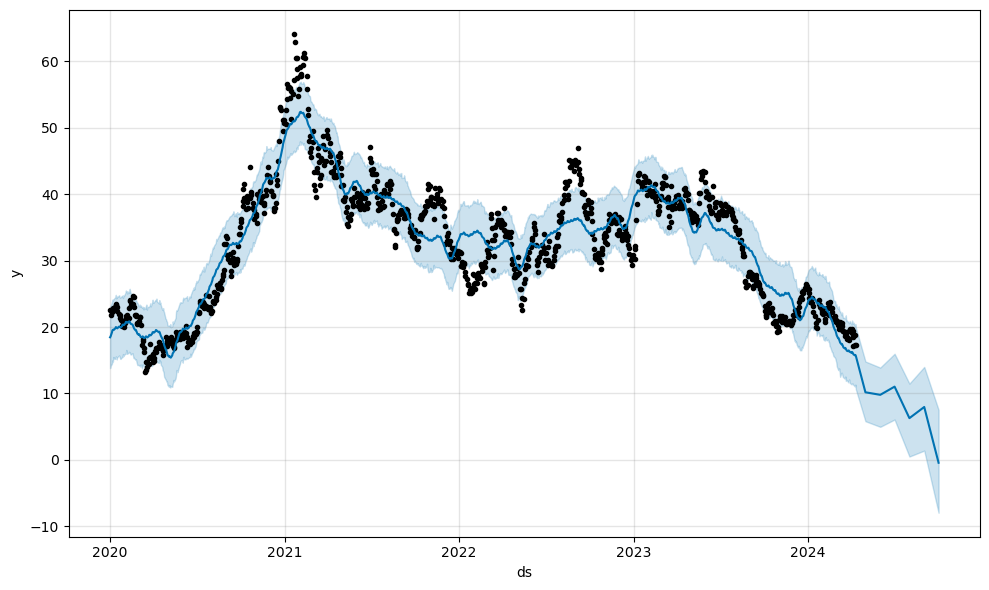

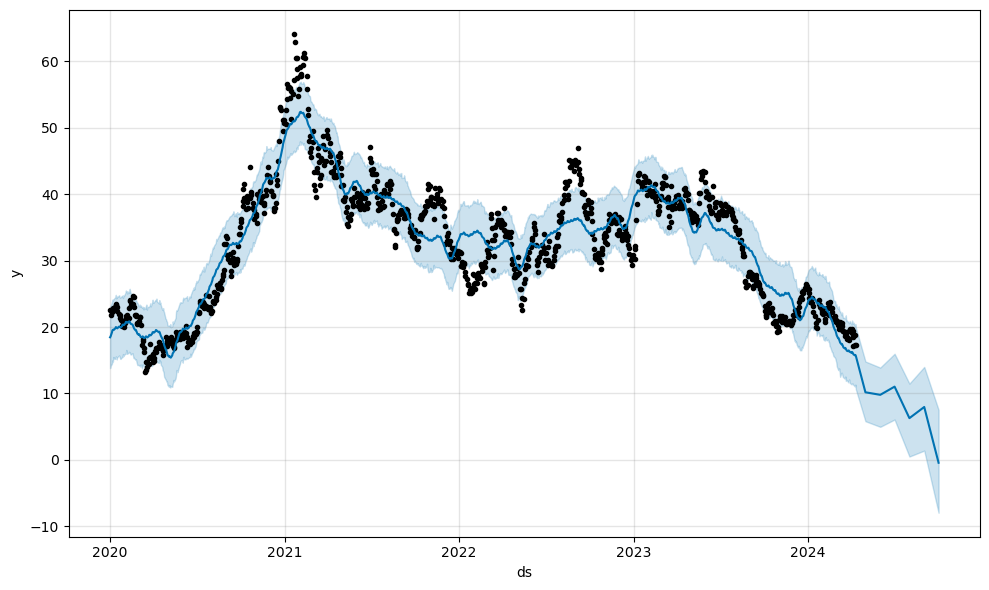

In [21]:
# Plot the Prophet predictions for CSIQ
model_CSIQ.plot(forecast_CSIQ)

In [22]:
# Create an individual data frame for DQ
DQ_df = combined_df[['Date', 'DQ']].copy()
# Rename columns for prophet model syntax
DQ_df.rename(columns={'Date': 'ds', 'DQ': 'y'}, inplace=True)
# Review DQ data frame
DQ_df.head()

,ds,y
0,2020-01-02,10.996
1,2020-01-03,10.890
2,2020-01-06,10.770
3,2020-01-07,10.672
4,2020-01-08,10.876


In [23]:
# Create a Prophet model for DQ
model_DQ = Prophet()

In [24]:
# Fit the DQ Prophet model
model_DQ.fit(DQ_df)

20:07:27 - cmdstanpy - INFO - Chain [1] start processing
20:07:27 - cmdstanpy - INFO - Chain [1] done processing


In [25]:
# Forecast 6 months of stock performance
future_DQ = model_DQ.make_future_dataframe(periods=6, freq="M")
# Display last five rows of future_DQ dataframe
future_DQ.tail()

,ds
1076,2024-05-31
1077,2024-06-30
1078,2024-07-31
1079,2024-08-31
1080,2024-09-30


In [26]:
# Make predictions for DQ using the future_DQ data frame
forecast_DQ = model_DQ.predict(future_DQ)
# Display the first five rows of the forecast_DQ data frame
forecast_DQ.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-02,6.196470,-7.524209,10.449153,6.196470,6.196470,-4.713026,-4.713026,-4.713026,-0.979285,-0.979285,-0.979285,-3.733741,-3.733741,-3.733741,0.0,0.0,0.0,1.483444
1,2020-01-03,6.251479,-7.129227,10.648312,6.251479,6.251479,-4.502613,-4.502613,-4.502613,-1.082597,-1.082597,-1.082597,-3.420015,-3.420015,-3.420015,0.0,0.0,0.0,1.748867
2,2020-01-06,6.416506,-7.058408,12.207464,6.416506,6.416506,-3.824954,-3.824954,-3.824954,-1.254771,-1.254771,-1.254771,-2.570183,-2.570183,-2.570183,0.0,0.0,0.0,2.591552
3,2020-01-07,6.471515,-5.560324,12.883978,6.471515,6.471515,-3.038642,-3.038642,-3.038642,-0.720449,-0.720449,-0.720449,-2.318193,-2.318193,-2.318193,0.0,0.0,0.0,3.432873
4,2020-01-08,6.526524,-5.368523,12.992874,6.526524,6.526524,-2.728715,-2.728715,-2.728715,-0.647817,-0.647817,-0.647817,-2.080897,-2.080897,-2.080897,0.0,0.0,0.0,3.797810


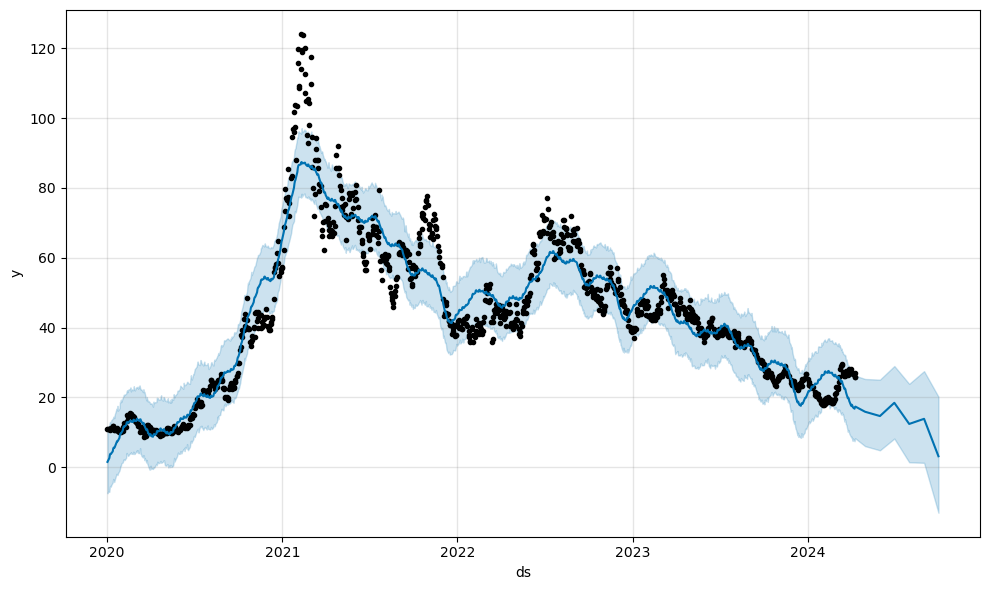

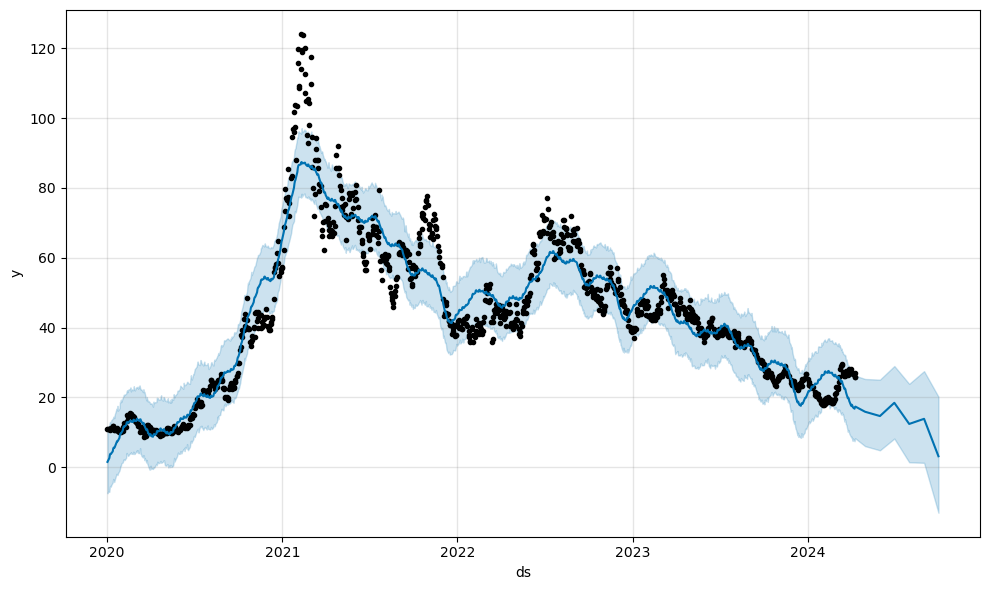

In [27]:
# Plot the Prophet predictions for DQ
model_DQ.plot(forecast_DQ)

In [28]:
# Create an individual data frame for ENPH
ENPH_df = combined_df[['Date', 'ENPH']].copy()
# Rename columns for prophet model syntax
ENPH_df.rename(columns={'Date': 'ds', 'ENPH': 'y'}, inplace=True)
# Review ENPH data frame
ENPH_df.head()

,ds,y
0,2020-01-02,29.340000
1,2020-01-03,29.290001
2,2020-01-06,29.660000
3,2020-01-07,29.990000
4,2020-01-08,31.000000


In [29]:
# Create a Prophet model for ENPH
model_ENPH = Prophet()

In [30]:
# Fit the ENPH Prophet model
model_ENPH.fit(ENPH_df)

20:07:28 - cmdstanpy - INFO - Chain [1] start processing
20:07:28 - cmdstanpy - INFO - Chain [1] done processing


In [31]:
# Forecast 6 months of stock performance
future_ENPH = model_ENPH.make_future_dataframe(periods=6, freq="M")
# Display last five rows of future_ENPH dataframe
future_ENPH.tail()

,ds
1076,2024-05-31
1077,2024-06-30
1078,2024-07-31
1079,2024-08-31
1080,2024-09-30


In [32]:
# Make predictions for ENPH using the future_ENPH data frame
forecast_ENPH = model_ENPH.predict(future_ENPH)
# Display the first five rows of the forecast_ENPH data frame
forecast_ENPH.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-02,15.860208,4.019785,64.057102,15.860208,15.860208,18.299220,18.299220,18.299220,-2.530245,-2.530245,-2.530245,20.829464,20.829464,20.829464,0.0,0.0,0.0,34.159428
1,2020-01-03,16.192094,3.544632,66.260983,16.192094,16.192094,16.618209,16.618209,16.618209,-3.158840,-3.158840,-3.158840,19.777048,19.777048,19.777048,0.0,0.0,0.0,32.810303
2,2020-01-06,17.187753,-0.239747,61.304768,17.187753,17.187753,13.213973,13.213973,13.213973,-3.058482,-3.058482,-3.058482,16.272455,16.272455,16.272455,0.0,0.0,0.0,30.401726
3,2020-01-07,17.519639,2.290908,59.560949,17.519639,17.519639,12.438779,12.438779,12.438779,-2.587116,-2.587116,-2.587116,15.025895,15.025895,15.025895,0.0,0.0,0.0,29.958418
4,2020-01-08,17.851525,-3.017337,60.618837,17.851525,17.851525,11.795612,11.795612,11.795612,-1.965944,-1.965944,-1.965944,13.761556,13.761556,13.761556,0.0,0.0,0.0,29.647137


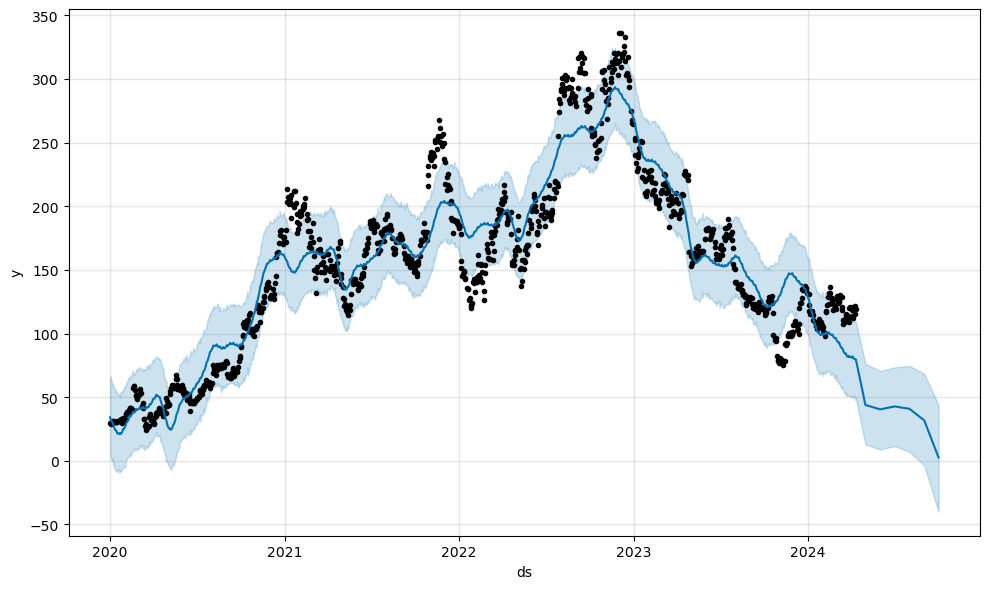

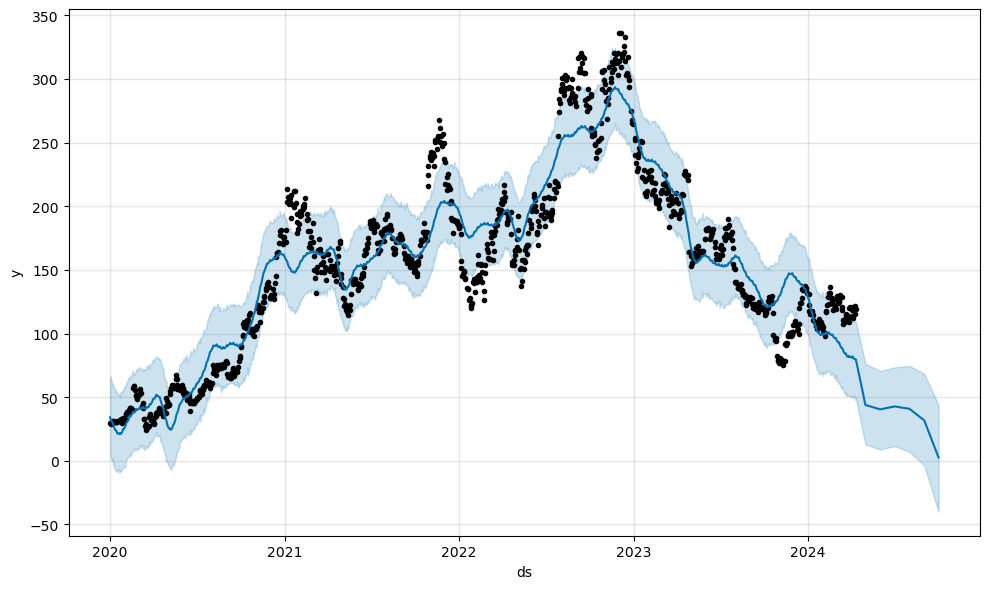

In [33]:
# Plot the Prophet predictions for ENPH
model_ENPH.plot(forecast_ENPH)

In [34]:
# Create an individual data frame for FSLR
FSLR_df = combined_df[['Date', 'FSLR']].copy()
# Rename columns for prophet model syntax
FSLR_df.rename(columns={'Date': 'ds', 'FSLR': 'y'}, inplace=True)
# Review FSLR data frame
FSLR_df.head()

,ds,y
0,2020-01-02,57.240002
1,2020-01-03,57.020000
2,2020-01-06,55.830002
3,2020-01-07,56.669998
4,2020-01-08,56.700001


In [35]:
# Create a Prophet model for FSLR
model_FSLR = Prophet()

In [36]:
# Fit the FSLR Prophet model
model_FSLR.fit(FSLR_df)

20:07:28 - cmdstanpy - INFO - Chain [1] start processing
20:07:29 - cmdstanpy - INFO - Chain [1] done processing


In [37]:
# Forecast 6 months of stock performance
future_FSLR = model_FSLR.make_future_dataframe(periods=6, freq="M")
# Display last five rows of future_FSLR dataframe
future_FSLR.tail()

,ds
1076,2024-05-31
1077,2024-06-30
1078,2024-07-31
1079,2024-08-31
1080,2024-09-30


In [38]:
# Make predictions for FSLR using the future_FSLR data frame
forecast_FSLR = model_FSLR.predict(future_FSLR)
# Display the first five rows of the forecast_FSLR data frame
forecast_FSLR.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-02,42.323971,32.823583,59.205482,42.323971,42.323971,4.305075,4.305075,4.305075,-3.080979,-3.080979,-3.080979,7.386054,7.386054,7.386054,0.0,0.0,0.0,46.629046
1,2020-01-03,42.417105,32.585289,60.431558,42.417105,42.417105,4.700202,4.700202,4.700202,-2.888891,-2.888891,-2.888891,7.589093,7.589093,7.589093,0.0,0.0,0.0,47.117307
2,2020-01-06,42.696508,34.645040,61.585088,42.696508,42.696508,5.176925,5.176925,5.176925,-2.760570,-2.760570,-2.760570,7.937495,7.937495,7.937495,0.0,0.0,0.0,47.873433
3,2020-01-07,42.789642,33.454254,61.449396,42.789642,42.789642,5.113554,5.113554,5.113554,-2.850041,-2.850041,-2.850041,7.963595,7.963595,7.963595,0.0,0.0,0.0,47.903196
4,2020-01-08,42.882776,35.362149,61.006029,42.882776,42.882776,5.067877,5.067877,5.067877,-2.877523,-2.877523,-2.877523,7.945400,7.945400,7.945400,0.0,0.0,0.0,47.950654


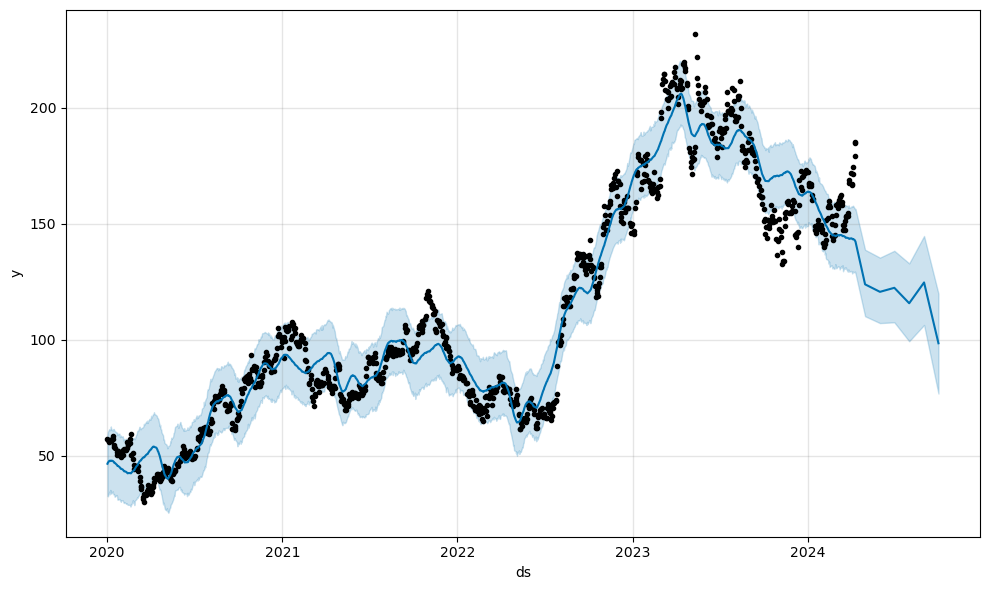

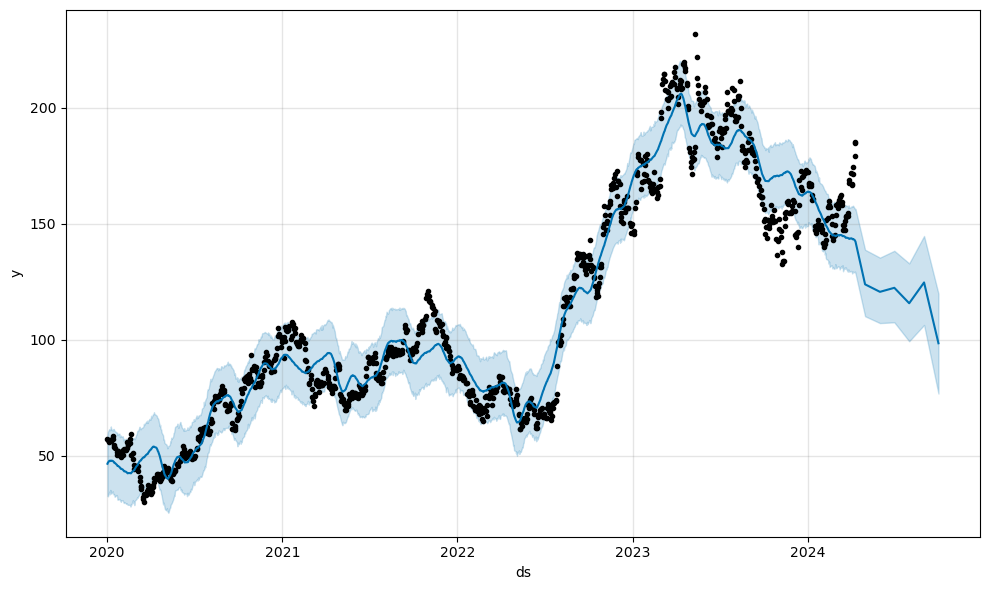

In [39]:
# Plot the Prophet predictions for FSLR
model_FSLR.plot(forecast_FSLR)

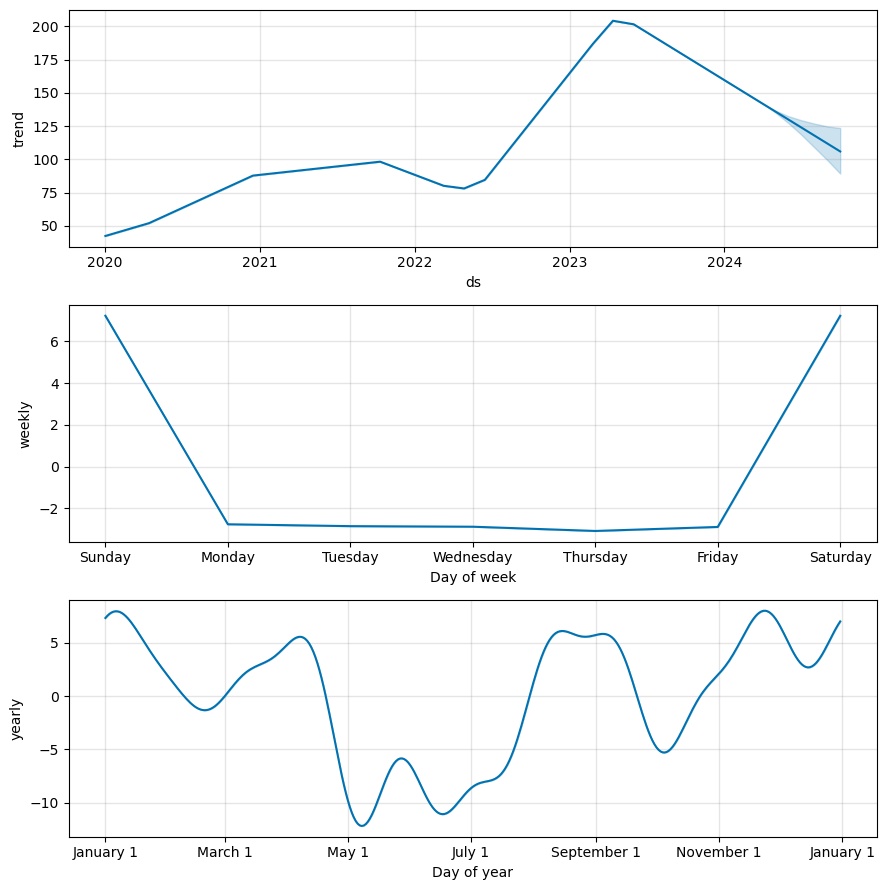

In [40]:
# test plot for various components in model
test_figure = model_FSLR.plot_components(forecast_FSLR)

In [41]:
# Create an individual data frame for JKS
JKS_df = combined_df[['Date', 'JKS']].copy()
# Rename columns for prophet model syntax
JKS_df.rename(columns={'Date': 'ds', 'JKS': 'y'}, inplace=True)
# Review JKS data frame
JKS_df.head()

,ds,y
0,2020-01-02,23.84
1,2020-01-03,22.59
2,2020-01-06,22.49
3,2020-01-07,22.74
4,2020-01-08,22.23


In [42]:
# Create a Prophet model for JKS
model_JKS = Prophet()

In [43]:
# Fit the JKS Prophet model
model_JKS.fit(JKS_df)

20:07:30 - cmdstanpy - INFO - Chain [1] start processing


20:07:30 - cmdstanpy - INFO - Chain [1] done processing


In [44]:
# Forecast 6 months of stock performance
future_JKS = model_JKS.make_future_dataframe(periods=6, freq="M")
# Display last five rows of future_JKS dataframe
future_JKS.tail()

,ds
1076,2024-05-31
1077,2024-06-30
1078,2024-07-31
1079,2024-08-31
1080,2024-09-30


In [45]:
# Make predictions for JKS using the future_JKS data frame
forecast_JKS = model_JKS.predict(future_JKS)
# Display the first five rows of the forecast_JKS data frame
forecast_JKS.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-02,15.011499,8.381426,26.425249,15.011499,15.011499,2.411533,2.411533,2.411533,-1.741381,-1.741381,-1.741381,4.152914,4.152914,4.152914,0.0,0.0,0.0,17.423032
1,2020-01-03,15.076939,8.922738,26.232873,15.076939,15.076939,2.391930,2.391930,2.391930,-1.929448,-1.929448,-1.929448,4.321378,4.321378,4.321378,0.0,0.0,0.0,17.468869
2,2020-01-06,15.273260,9.084643,26.512652,15.273260,15.273260,2.750695,2.750695,2.750695,-1.953862,-1.953862,-1.953862,4.704556,4.704556,4.704556,0.0,0.0,0.0,18.023954
3,2020-01-07,15.338700,9.556878,27.759907,15.338700,15.338700,3.221448,3.221448,3.221448,-1.568818,-1.568818,-1.568818,4.790266,4.790266,4.790266,0.0,0.0,0.0,18.560148
4,2020-01-08,15.404140,9.614713,27.220315,15.404140,15.404140,3.383462,3.383462,3.383462,-1.472030,-1.472030,-1.472030,4.855492,4.855492,4.855492,0.0,0.0,0.0,18.787602


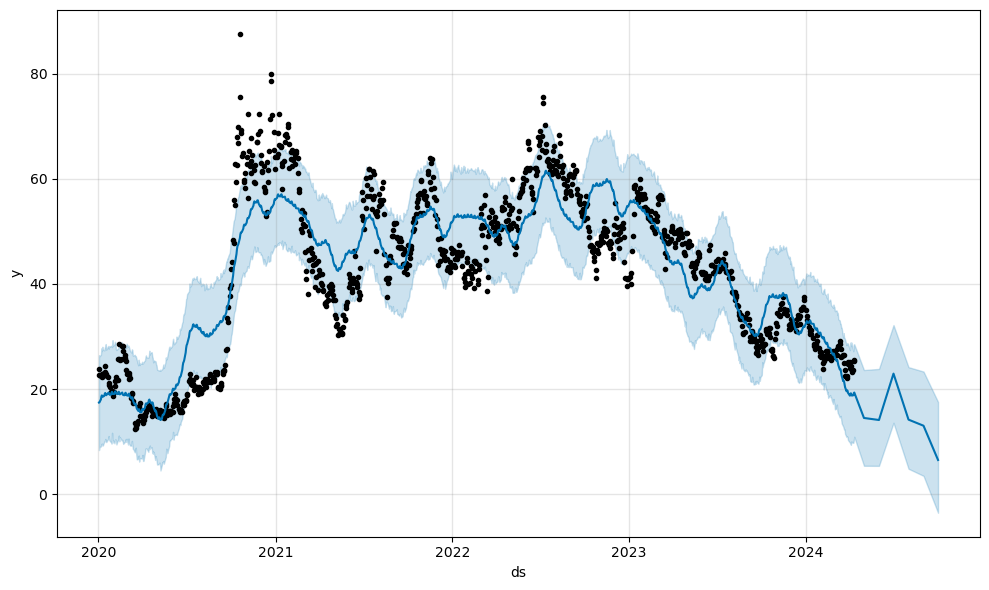

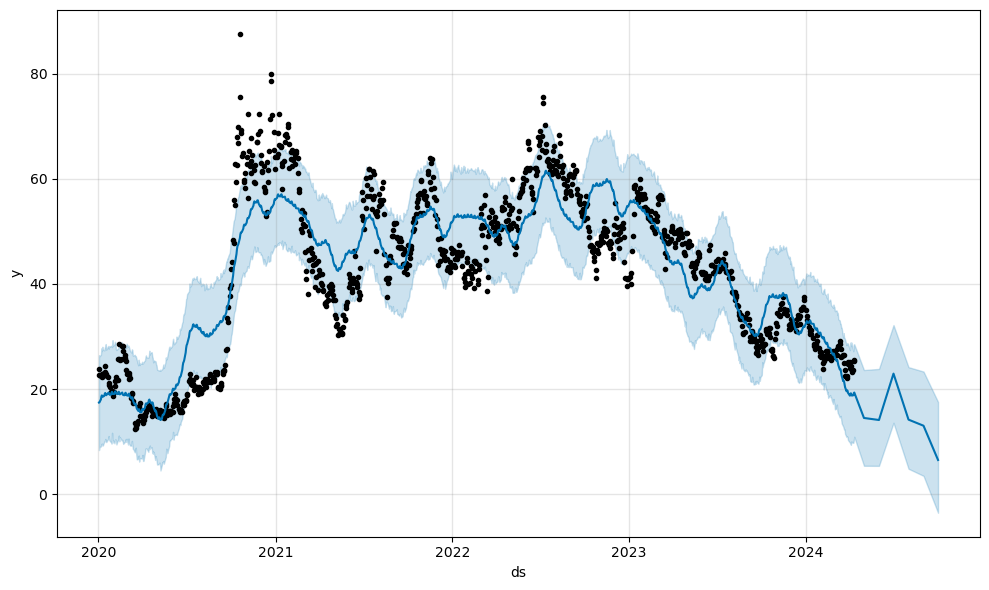

In [46]:
# Plot the Prophet predictions for JKS
model_JKS.plot(forecast_JKS)

In [47]:
# Create an individual data frame for SEDG
SEDG_df = combined_df[['Date', 'SEDG']].copy()
# Rename columns for prophet model syntax
SEDG_df.rename(columns={'Date': 'ds', 'SEDG': 'y'}, inplace=True)
# Review SEDG data frame
SEDG_df.head()

,ds,y
0,2020-01-02,101.809998
1,2020-01-03,102.379997
2,2020-01-06,99.629997
3,2020-01-07,101.790001
4,2020-01-08,104.160004


In [48]:
# Create a Prophet model for SEDG
model_SEDG = Prophet()

In [49]:
# Fit the SEDG Prophet model
model_SEDG.fit(SEDG_df)

20:07:30 - cmdstanpy - INFO - Chain [1] start processing
20:07:30 - cmdstanpy - INFO - Chain [1] done processing


In [50]:
# Forecast 6 months of stock performance
future_SEDG = model_SEDG.make_future_dataframe(periods=6, freq="M")
# Display last five rows of future_SEDG dataframe
future_SEDG.tail()

,ds
1076,2024-05-31
1077,2024-06-30
1078,2024-07-31
1079,2024-08-31
1080,2024-09-30


In [51]:
# Make predictions for SEDG using the future_SEDG data frame
forecast_SEDG = model_SEDG.predict(future_SEDG)
# Display the first five rows of the forecast_SEDG data frame
forecast_SEDG.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-02,68.782678,41.055520,121.093337,68.782678,68.782678,11.584366,11.584366,11.584366,-6.805372,-6.805372,-6.805372,18.389737,18.389737,18.389737,0.0,0.0,0.0,80.367044
1,2020-01-03,69.374705,39.152850,121.692005,69.374705,69.374705,11.000210,11.000210,11.000210,-7.231013,-7.231013,-7.231013,18.231223,18.231223,18.231223,0.0,0.0,0.0,80.374916
2,2020-01-06,71.150785,40.888629,120.849449,71.150785,71.150785,10.664719,10.664719,10.664719,-6.407198,-6.407198,-6.407198,17.071917,17.071917,17.071917,0.0,0.0,0.0,81.815505
3,2020-01-07,71.742812,41.848975,121.403421,71.742812,71.742812,10.208415,10.208415,10.208415,-6.264203,-6.264203,-6.264203,16.472618,16.472618,16.472618,0.0,0.0,0.0,81.951227
4,2020-01-08,72.334839,44.601361,122.466847,72.334839,72.334839,10.006632,10.006632,10.006632,-5.774115,-5.774115,-5.774115,15.780747,15.780747,15.780747,0.0,0.0,0.0,82.341471


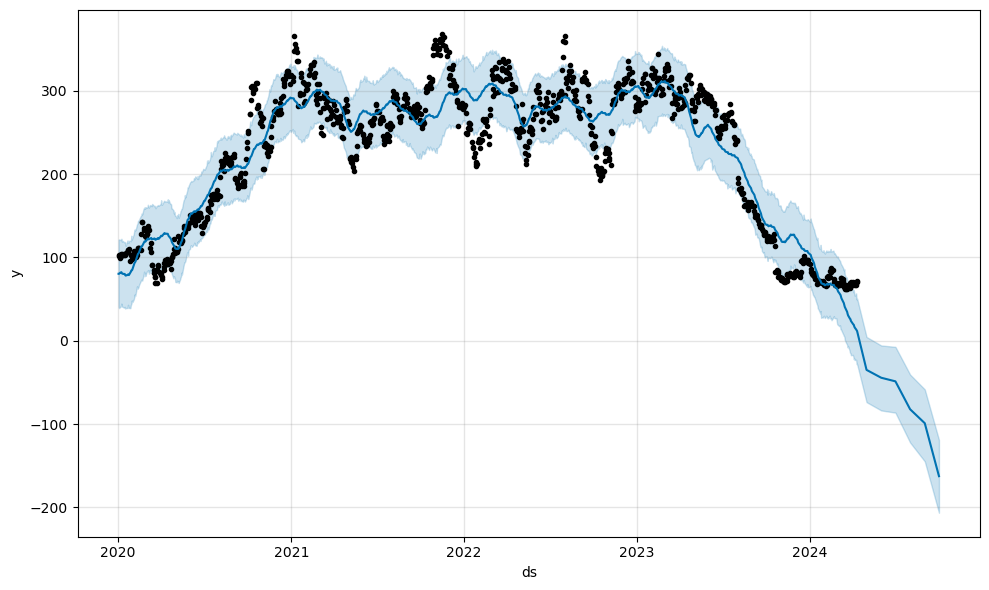

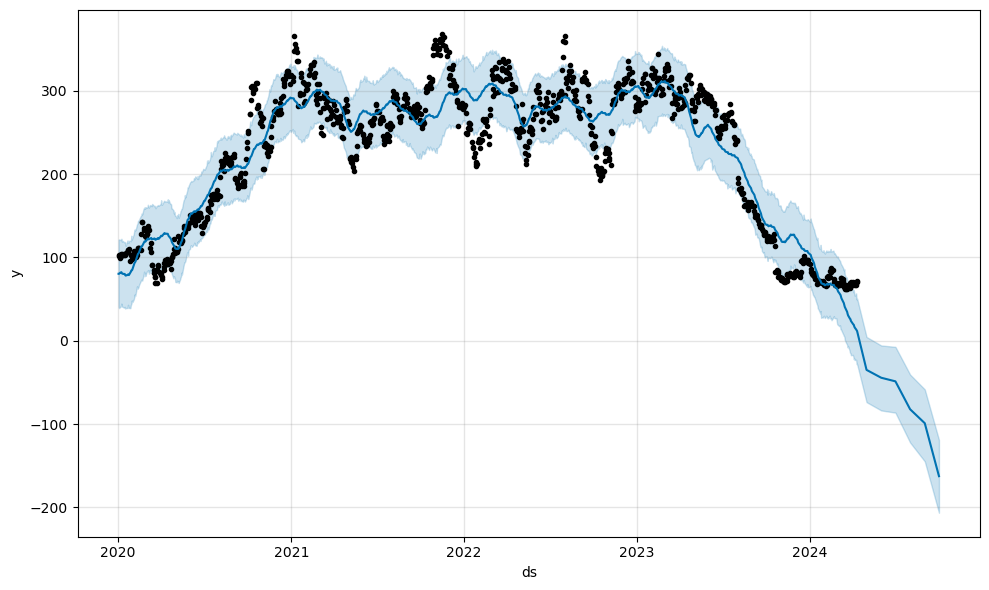

In [52]:
# Plot the Prophet predictions for SEDG
model_SEDG.plot(forecast_SEDG)

In [53]:
# Create an individual data frame for SPWR
SPWR_df = combined_df[['Date', 'SPWR']].copy()
# Rename columns for prophet model syntax
SPWR_df.rename(columns={'Date': 'ds', 'SPWR': 'y'}, inplace=True)
# Review SPWR data frame
SPWR_df.head()

,ds,y
0,2020-01-02,5.127701
1,2020-01-03,4.826457
2,2020-01-06,4.891945
3,2020-01-07,5.003274
4,2020-01-08,5.029470


In [54]:
# Create a Prophet model for SPWR
model_SPWR = Prophet()

In [55]:
# Fit the SPWR Prophet model
model_SPWR.fit(SPWR_df)

20:07:31 - cmdstanpy - INFO - Chain [1] start processing
20:07:31 - cmdstanpy - INFO - Chain [1] done processing


In [56]:
# Forecast 6 months of stock performance
future_SPWR = model_SPWR.make_future_dataframe(periods=6, freq="M")
# Display last five rows of future_SPWR dataframe
future_SPWR.tail()

,ds
1076,2024-05-31
1077,2024-06-30
1078,2024-07-31
1079,2024-08-31
1080,2024-09-30


In [57]:
# Make predictions for SPWR using the future_SPWR data frame
forecast_SPWR = model_SPWR.predict(future_SPWR)
# Display the first five rows of the forecast_SPWR data frame
forecast_SPWR.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-02,2.446621,-1.710549,6.196451,2.446621,2.446621,-0.076340,-0.076340,-0.076340,-0.543095,-0.543095,-0.543095,0.466755,0.466755,0.466755,0.0,0.0,0.0,2.370281
1,2020-01-03,2.477979,-1.840329,6.483505,2.477979,2.477979,-0.059421,-0.059421,-0.059421,-0.554128,-0.554128,-0.554128,0.494707,0.494707,0.494707,0.0,0.0,0.0,2.418558
2,2020-01-06,2.572056,-1.119130,6.439911,2.572056,2.572056,0.035716,0.035716,0.035716,-0.583828,-0.583828,-0.583828,0.619543,0.619543,0.619543,0.0,0.0,0.0,2.607772
3,2020-01-07,2.603415,-1.021593,6.763265,2.603415,2.603415,0.204953,0.204953,0.204953,-0.472047,-0.472047,-0.472047,0.677000,0.677000,0.677000,0.0,0.0,0.0,2.808368
4,2020-01-08,2.634774,-1.125050,7.029658,2.634774,2.634774,0.260915,0.260915,0.260915,-0.482460,-0.482460,-0.482460,0.743374,0.743374,0.743374,0.0,0.0,0.0,2.895689


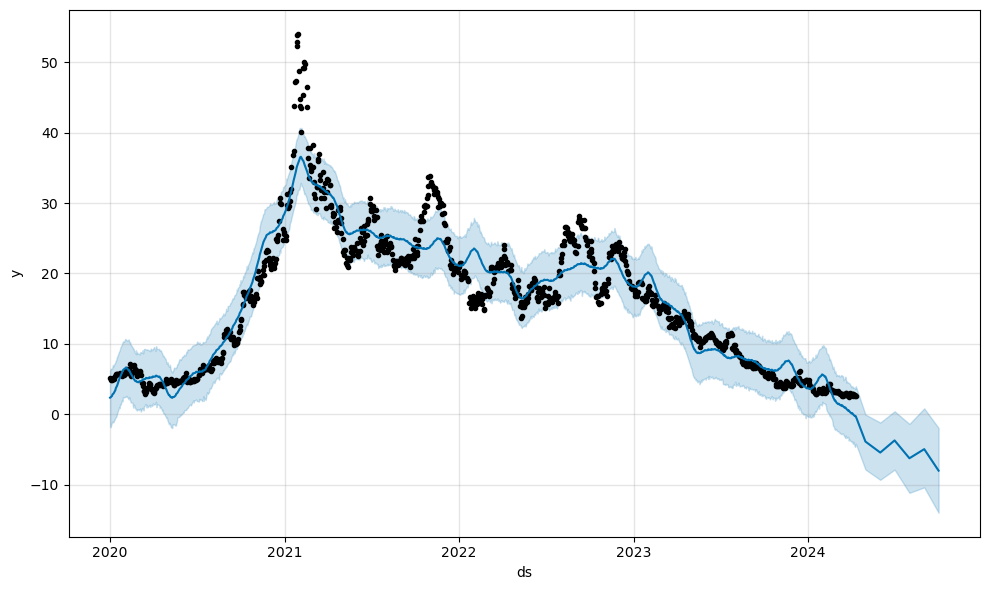

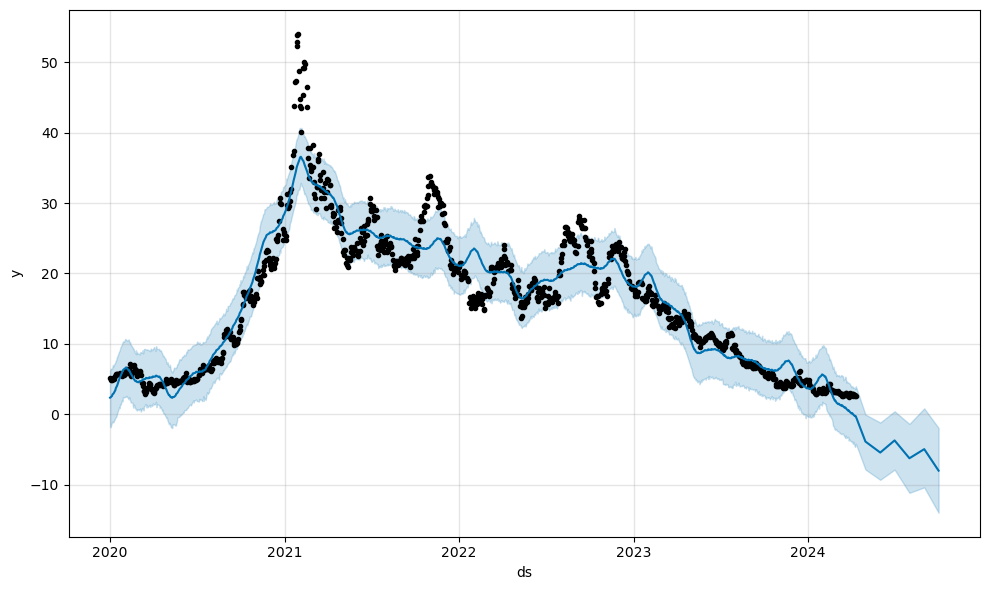

In [58]:
# Plot the Prophet predictions for SPWR
model_SPWR.plot(forecast_SPWR)